Pasos a verificar

1. Partición: Train, Validacion, Test

In [10]:
# Importar base
import pandas as pd

In [11]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


In [12]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Elimina vacíos, outliers y posteriormente convierte las variables categóricas en númericas

In [13]:
import pandas as pd
import numpy as np

# Supongamos que tu dataframe se llama df
# Eliminar la columna 'id'
df = df.drop(columns=['id'])

# Eliminar filas con valores nulos
df = df.dropna()

# Quitar outliers usando el método del rango intercuartílico (IQR)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # Primer cuartil
    Q3 = df[column].quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartílico
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Aplicar el método de outliers a columnas numéricas relevantes
numeric_columns = ['age', 'avg_glucose_level', 'bmi']
for column in numeric_columns:
    df = remove_outliers(df, column)

# Verificar el resultado
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 4252 entries, 2 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4252 non-null   object 
 1   age                4252 non-null   float64
 2   hypertension       4252 non-null   int64  
 3   heart_disease      4252 non-null   int64  
 4   ever_married       4252 non-null   object 
 5   work_type          4252 non-null   object 
 6   Residence_type     4252 non-null   object 
 7   avg_glucose_level  4252 non-null   float64
 8   bmi                4252 non-null   float64
 9   smoking_status     4252 non-null   object 
 10  stroke             4252 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 398.6+ KB
None
               age  hypertension  heart_disease  avg_glucose_level  \
count  4252.000000   4252.000000    4252.000000        4252.000000   
mean     40.598655      0.068674       0.036453          91.51317

1. Partición en Train, Validacion, Test

In [14]:
from sklearn.model_selection import train_test_split

# Dividir el dataframe en dos partes: train+validation (66%) y test (33%)
train_val, test = train_test_split(df, test_size=0.33, random_state=42)

# Dividir train+validation en train (33%) y validation (33%)
train, validation = train_test_split(train_val, test_size=0.5, random_state=42)

# Verificar tamaños de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {len(train)}")
print(f"Tamaño del conjunto de validación: {len(validation)}")
print(f"Tamaño del conjunto de prueba: {len(test)}")


Tamaño del conjunto de entrenamiento: 1424
Tamaño del conjunto de validación: 1424
Tamaño del conjunto de prueba: 1404


2. Partición de las clase de las clases de salida (Y)

Conteo de la variable 'stroke':
stroke
0    1384
1      40
Name: count, dtype: int64


C:\Users\L03129163\AppData\Local\Temp\ipykernel_21704\2904898540.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stroke_counts.index, y=stroke_counts.values, palette="viridis")


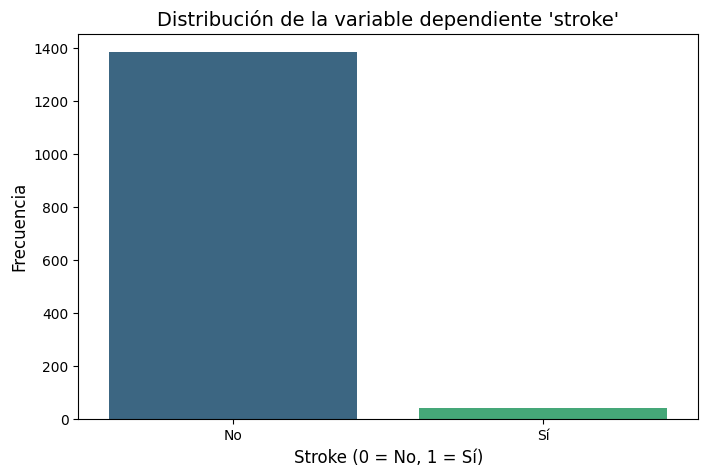

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conteo de valores de la variable dependiente 'stroke'
stroke_counts = train['stroke'].value_counts()
print("Conteo de la variable 'stroke':")
print(stroke_counts)

# Gráfica de barras para la variable 'stroke'
plt.figure(figsize=(8, 5))
sns.barplot(x=stroke_counts.index, y=stroke_counts.values, palette="viridis")
plt.title("Distribución de la variable dependiente 'stroke'", fontsize=14)
plt.xlabel("Stroke (0 = No, 1 = Sí)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'], fontsize=10)
plt.show()

3. Preprocesamiento y entrenamiento del modelo cuidando el filtrado de información (data leakage)

In [16]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1


In [17]:
from sklearn.preprocessing import LabelEncoder

# Identificar las columnas categóricas
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Convertir variables categóricas a numéricas con LabelEncoder
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    label_encoders[col] = le  # Guardar el encoder para transformaciones futuras

# Verificar las primeras filas del dataset procesado
print(train.head())

      gender   age  hypertension  heart_disease  ever_married  work_type  \
3565       0  40.0             0              0             1          2   
2917       0  18.0             0              0             0          1   
4743       1  62.0             0              0             1          0   
2375       0  30.0             0              0             1          2   
4825       0  14.0             0              0             0          4   

      Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
3565               1              65.77  31.2               2       0  
2917               1              82.36  22.7               0       0  
4743               0              66.20  30.0               0       0  
2375               1              74.43  44.8               2       0  
4825               1              71.80  18.8               0       0  


In [18]:
# Verificar el resultado
train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3565,0,40.0,0,0,1,2,1,65.77,31.2,2,0
2917,0,18.0,0,0,0,1,1,82.36,22.7,0,0
4743,1,62.0,0,0,1,0,0,66.20,30.0,0,0
2375,0,30.0,0,0,1,2,1,74.43,44.8,2,0
4825,0,14.0,0,0,0,4,1,71.80,18.8,0,0


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Separar características (X) y objetivo (y)
X_train = train.drop(columns=['stroke'])
y_train = train['stroke']

# Crear un pipeline con escalado de características y modelo de regresión logística
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42))
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Verificar el score del modelo en el conjunto de entrenamiento
train_score = pipeline.score(X_train, y_train)
print(f"Accuracy en el conjunto de entrenamiento: {train_score:.4f}")

Accuracy en el conjunto de entrenamiento: 0.9719


4. Ajustar métricas para datos no balanceados

In [20]:
from sklearn.utils import resample

# Separar las clases mayoritaria y minoritaria
train_majority = train[train.stroke == 0]
train_minority = train[train.stroke == 1]

# Sobremuestrear la clase minoritaria
train_minority_upsampled = resample(train_minority, 
                                    replace=True,     # Sobremuestrear con reemplazo
                                    n_samples=len(train_majority),    # Igualar el número de muestras de la clase mayoritaria
                                    random_state=42)  # Fijar la semilla para reproducibilidad

# Combinar las clases mayoritaria y minoritaria sobremuestreada
train_balanced = pd.concat([train_majority, train_minority_upsampled])

# Verificar el balance de clases
print(train_balanced.stroke.value_counts())

stroke
0    1384
1    1384
Name: count, dtype: int64


In [21]:
# Separar características (X) y objetivo (y) en el conjunto balanceado
X_train_balanced = train_balanced.drop(columns=['stroke'])
y_train_balanced = train_balanced['stroke']

# Crear un pipeline con escalado de características y modelo de regresión logística
pipeline_balanced = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42))
])

# Entrenar el modelo con el conjunto balanceado
pipeline_balanced.fit(X_train_balanced, y_train_balanced)

# Verificar el score del modelo en el conjunto de entrenamiento balanceado
train_balanced_score = pipeline_balanced.score(X_train_balanced, y_train_balanced)
print(f"Accuracy en el conjunto de entrenamiento balanceado: {train_balanced_score:.4f}")

Accuracy en el conjunto de entrenamiento balanceado: 0.7883


5. ¿Cuál error es el más importante (el que quiero que sea más pequeño): FN o FP?

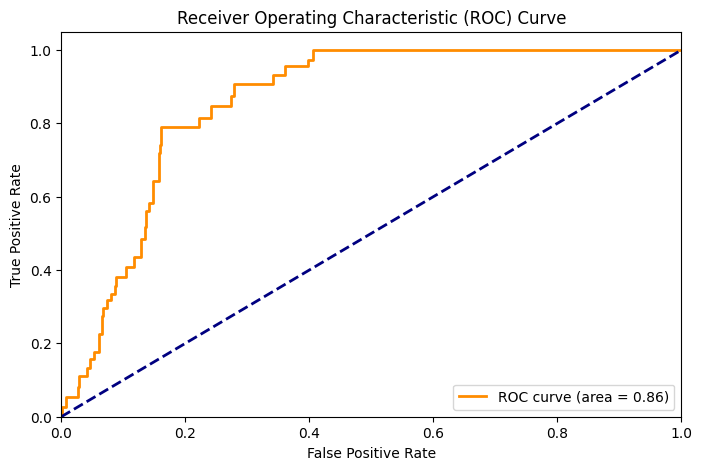

Matriz de Confusión:
[[1008  376]
 [ 210 1174]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.73      0.77      1384
           1       0.76      0.85      0.80      1384

    accuracy                           0.79      2768
   macro avg       0.79      0.79      0.79      2768
weighted avg       0.79      0.79      0.79      2768



In [22]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report

# Predecir probabilidades para el conjunto de entrenamiento balanceado
y_train_balanced_prob = pipeline_balanced.predict_proba(X_train_balanced)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_train_balanced, y_train_balanced_prob)
roc_auc = roc_auc_score(y_train_balanced, y_train_balanced_prob)

# Graficar la curva ROC
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Predecir etiquetas para el conjunto de entrenamiento balanceado
y_train_balanced_pred = pipeline_balanced.predict(X_train_balanced)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_train_balanced, y_train_balanced_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Calcular el reporte de clasificación
class_report = classification_report(y_train_balanced, y_train_balanced_pred)
print("Reporte de Clasificación:")
print(class_report)